In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
fill_work_remote = lambda x: False if x == 'Never' else True

df.drop(df[df['HomeRemote'] == 'It\'s complicated'].index, inplace=True)
df.dropna(subset=['HomeRemote'], inplace=True)
df['WorkRemote'] = df['HomeRemote'].apply(fill_work_remote)


In [69]:
df['WorkRemote'].value_counts()

True     28184
False    13975
Name: WorkRemote, dtype: int64

In [70]:
df.dropna(subset=['Salary'], inplace=True)

In [71]:
salary_mean = df.groupby(['WorkRemote'])['Salary'].mean()
salary_mean

WorkRemote
False    46862.620192
True     61448.110385
Name: Salary, dtype: float64

<AxesSubplot:xlabel='WorkRemote'>

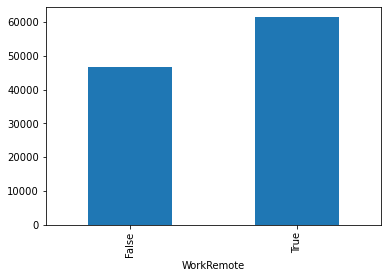

In [72]:
salary_mean.plot(kind='bar')

<AxesSubplot:xlabel='WorkRemote'>

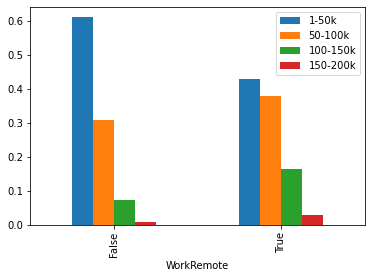

In [73]:
sal_range = [1000, 50000, 100000, 150000, 200000]
sal_range_labels = ['1-50k', '50-100k', '100-150k', '150-200k']

df['SalaryScale'] = pd.cut(df['Salary'], bins=sal_range, labels=sal_range_labels)
salary_mean = df.groupby(['WorkRemote'])['SalaryScale'].value_counts(normalize=True).unstack()
salary_mean.plot(kind='bar')

<AxesSubplot:xlabel='WorkRemote'>

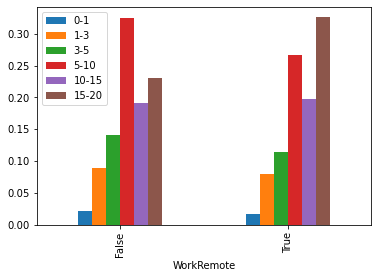

In [74]:
fill_years_range = lambda x: int(x) if type(x) == float else int(x.split(' ')[0])

df = df.dropna(subset=['YearsProgram'], axis=0)
df = df[df['YearsProgram'] != 'Less than a year']

df['YearsProgram'] = df['YearsProgram'].apply(fill_years_range)
df['YearsProgramRange'] = pd.cut(df['YearsProgram'], bins=[0, 1, 3, 5, 10, 15, 20], labels=['0-1', '1-3', '3-5', '5-10', '10-15', '15-20'])

years_program = df.groupby(['WorkRemote'])['YearsProgramRange'].value_counts(normalize=True).unstack()
years_program.plot(kind='bar')